The simulated input data contains the following fields.
* event_id
* artist_id
* location_id
* start_date
* attendance
* average_ticket_price

The location_id column encodes additional information about the locations in the ID itself, following one of two schemas.
* LOC-[Type][Capacity][State]-[ID]
* LOC-[Type][Capacity][State]-[Ownership Flag]-[ID]
For example, the location ID LOC-Arena20000FL-8521e4fd-672c represents a non-client owned Arena with a capacity of 20000 in Florida, while the location ID LOC-Arena100000CA-Own-8521e4fd-672c represents as a client owned Arena with a capacity of 100000 in California.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('music_concert.csv')
print(df.head())

            event_id          artist_id                         location_id  \
0  EVT-3adca30d-b5ea  ART-4de1a19c-0779      LOC-Arena16800OH-621a3f60-24c0   
1  EVT-bc114a58-3eaf  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
2  EVT-78a9775c-5eee  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
3  EVT-cf249300-7259  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
4  EVT-54753efb-60ca  ART-4de1a19c-0779  LOC-Arena14400OK-Own-226f9270-4eb6   

  start_date  attendance  average_ticket_price  
0     1/2/14       10542                 41.45  
1    1/11/14       11390                 57.35  
2    8/29/14       11482                 57.36  
3    2/15/17         152                 59.63  
4    1/17/14        9513                 42.79  


The following code section translates the location IDs into the location type, capacity,
ownership type, and state. And the estimated total revenue is calculated by multiplying attendance with average ticket price.


In [2]:
location_detail = df['location_id'].str.split('-', expand=True)
df[['location_type', 'location_capacity', 'state']] \
  = location_detail[1].str.extract(r'(\D+)(\d+)(\D+)')
df['client_owned_location'] = df['location_id'].str.contains('-Own-')
df['total_revenue'] = df['attendance'] * df['average_ticket_price']
print(df.head())

            event_id          artist_id                         location_id  \
0  EVT-3adca30d-b5ea  ART-4de1a19c-0779      LOC-Arena16800OH-621a3f60-24c0   
1  EVT-bc114a58-3eaf  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
2  EVT-78a9775c-5eee  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
3  EVT-cf249300-7259  ART-4de1a19c-0779  LOC-Arena15200NY-Own-334a8797-8708   
4  EVT-54753efb-60ca  ART-4de1a19c-0779  LOC-Arena14400OK-Own-226f9270-4eb6   

  start_date  attendance  average_ticket_price location_type  \
0     1/2/14       10542                 41.45         Arena   
1    1/11/14       11390                 57.35         Arena   
2    8/29/14       11482                 57.36         Arena   
3    2/15/17         152                 59.63         Arena   
4    1/17/14        9513                 42.79         Arena   

  location_capacity state  client_owned_location  total_revenue  
0             16800    OH                  False      436965.90  
1       

In [3]:
print(df['attendance'].describe())
print(df['average_ticket_price'].describe())
print(df['location_capacity'].astype(float).describe())

count      289.000000
mean     12651.525952
std       6633.985202
min        116.000000
25%       8548.000000
50%      11922.000000
75%      14910.000000
max      52800.000000
Name: attendance, dtype: float64
count    286.000000
mean      45.816643
std       12.893347
min       23.610000
25%       35.397500
50%       43.525000
75%       55.525000
max       88.180000
Name: average_ticket_price, dtype: float64
count      289.000000
mean     17076.387543
std       8989.097812
min       1040.000000
25%      12800.000000
50%      16000.000000
75%      16800.000000
max      60900.000000
Name: location_capacity, dtype: float64


The following sections calculate the average attendance and average ticket price by location type.

In [4]:
df.groupby(['location_type'])['attendance'].mean()

location_type
Amphitheatre    12946.529412
Arena            8087.463158
Club              481.000000
Stadium         29851.782609
Name: attendance, dtype: float64

In [5]:
df.groupby(['location_type'])['average_ticket_price'].mean()

location_type
Amphitheatre    38.410952
Arena           54.830319
Club            38.800000
Stadium         63.376957
Name: average_ticket_price, dtype: float64

The following sections calculate the row count, average, standard deviation, variance, median, minimum, and maximum of the attendance and average ticket price by location type.

In [6]:
aggs_attendance = df.groupby('location_type')['attendance']\
  .agg([np.size, np.mean, np.std, np.var, np.median, np.min, np.max])
print(aggs_attendance)

               size          mean          std           var   median   amin  \
location_type                                                                  
Amphitheatre    170  12946.529412  3095.966187  9.585007e+06  13220.0   5642   
Arena            95   8087.463158  2506.118372  6.280629e+06   7831.0    116   
Club              1    481.000000          NaN           NaN    481.0    481   
Stadium          23  29851.782609  8307.205437  6.900966e+07  29450.0  17360   

                amax  
location_type         
Amphitheatre   20401  
Arena          14910  
Club             481  
Stadium        52800  


In [7]:
aggs_average_ticket_price = df.groupby('location_type')['average_ticket_price']\
  .agg([np.size, np.mean, np.std, np.var, np.median, np.min, np.max])
print(aggs_average_ticket_price)

               size       mean       std        var  median   amin   amax
location_type                                                            
Amphitheatre    170  38.410952  9.674380  93.593635  36.590  23.61  78.81
Arena            95  54.830319  7.885108  62.174924  54.445  32.20  73.87
Club              1  38.800000       NaN        NaN  38.800  38.80  38.80
Stadium          23  63.376957  9.469868  89.678395  62.450  46.08  88.18


The following section calculates the same attendance statistics by state, and sorted by attendance in descending order.

In [8]:
aggs_attendance = df.groupby('state')['attendance']\
  .agg([np.size, np.mean, np.std, np.var, np.median, np.min, np.max])
aggs_attendance.sort_values(by=['mean'], inplace=True, ascending=False)
print(aggs_attendance)

       size          mean           std           var   median   amin   amax
state                                                                       
CO        2  37996.000000    913.581961  8.346320e+05  37996.0  37350  38642
MN        3  31800.333333   4834.813578  2.337542e+07  32062.0  26840  36499
PA       14  19859.285714  11014.894150  1.213279e+08  17020.5   6603  52800
MI        3  19561.000000  11206.509671  1.255859e+08  19578.0   8346  30759
CT        1  18522.000000           NaN           NaN  18522.0  18522  18522
ON        6  16390.333333   8345.540670  6.964805e+07  12383.5  11448  32846
OH       23  14825.000000   4086.402619  1.669869e+07  15662.0   5892  29450
BC        3  14609.000000   9335.638543  8.715415e+07  11311.0   7370  25146
NJ       18  14329.611111   5497.386290  3.022126e+07  13255.0   9311  34486
WA        4  13733.750000   3728.988815  1.390536e+07  13458.0   9697  18322
VA       25  13223.520000   3331.294870  1.109753e+07  14666.0   7117  17626

The following section calculates the total revenue statistics by state, and sorted by attendance in descending order.

In [9]:
aggs_total_revenue = df.groupby('state')['total_revenue']\
  .agg([np.mean, np.std, np.var, np.median, np.min, np.max])
aggs_total_revenue.sort_values(by=['mean'], inplace=True, ascending=False)
print(aggs_total_revenue)

               mean            std           var       median        amin  \
state                                                                       
MN     2.247079e+06  540121.559804  2.917313e+11  2228629.620  1716418.00   
CO     2.163479e+06   50944.667706  2.595359e+09  2163479.320  2127456.00   
MI     1.279677e+06  885025.269147  7.832697e+11  1220492.520   425729.46   
BC     1.064139e+06  999228.661063  9.984579e+11   519061.790   455981.90   
ON     1.022657e+06  738336.373509  5.451406e+11   700431.965   561836.73   
PA     8.290438e+05  660619.397236  4.364180e+11   533079.990   227935.56   
TN     7.644420e+05  586667.271113  3.441785e+11   555141.935   331953.08   
MA     7.110380e+05            NaN           NaN   711038.020   711038.02   
WA     6.979959e+05  273337.928986  7.471362e+10   707589.960   354619.29   
NJ     6.790318e+05  394676.063258  1.557692e+11   604938.400   441015.60   
CT     6.201166e+05            NaN           NaN   620116.560   620116.56   

The following section uses the statsmodels function to create a regression model based on the input data.

In [10]:
import statsmodels.formula.api as smf

model = smf.ols(formula='total_revenue ~ \
  attendance + average_ticket_price + \
  location_type + \
  location_capacity.astype(float) + \
  state + client_owned_location', data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     307.5
Date:                Tue, 30 May 2023   Prob (F-statistic):          5.13e-188
Time:                        20:44:37   Log-Likelihood:                -3527.8
No. Observations:                 286   AIC:                             7150.
Df Residuals:                     239   BIC:                             7321.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

[Dr. Vincent Granville](https://mltechniques.com/author/) helped improve this analysis by suggesting the following actions.
* Create a scatter plot to compare the predicted and observed values. This visualization helps with understanding how the model performs.
* Compute the correlation matrix between features, and between response and features. Very high correlation between two independent features  lead to potentially meaningless correlation coefficients for these two features, and again close to getting a singular matrix.
* Instead of creating a regression model at the event level, create a regression model on aggregated data. Each observation can be an average, aggregated by bucket. You have as many observations as buckets (flag vectors), and you have much fewer features (independent variables) because event-level rows with null values are no longer features. This can help minimize overfitting too.

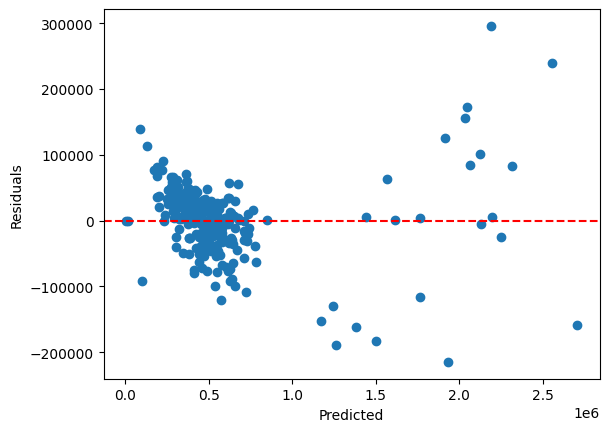

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(result.fittedvalues, result.resid)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()

The following heatmap chart shows the correlation between the features, and between the response and features. The total revenue is highly correlated with the attendance.

                       attendance  average_ticket_price  \
attendance               1.000000             -0.024045   
average_ticket_price    -0.024045              1.000000   
client_owned_location   -0.033541              0.166596   
total_revenue            0.877413              0.425942   

                       client_owned_location  total_revenue  
attendance                         -0.033541       0.877413  
average_ticket_price                0.166596       0.425942  
client_owned_location               1.000000       0.055164  
total_revenue                       0.055164       1.000000  


<Axes: >

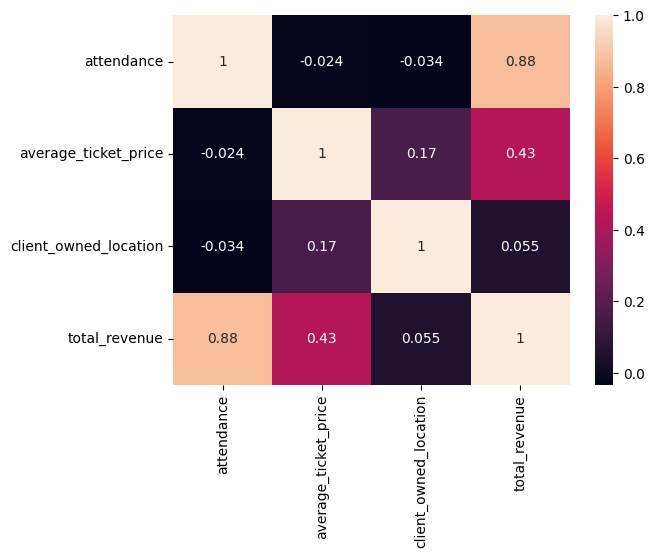

In [12]:
import seaborn as sns

corr_matrix = df.corr(numeric_only='False')
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True)

The following section transforms the original data set into an aggregated one.

In [13]:
new_data = df
new_data.drop(['event_id', 'artist_id', 'location_id', 'start_date'], axis=1)
grouped_new = new_data.groupby(['location_type', 'state', 'client_owned_location'])\
  .apply(lambda x: x[['attendance', 'average_ticket_price', 'location_capacity', \
                      'total_revenue']].mean())
grouped_new = grouped_new.reset_index()
print(grouped_new.head())
print(grouped_new.info())

  location_type state  client_owned_location  attendance  \
0  Amphitheatre    AL                  False      6369.0   
1  Amphitheatre    AZ                   True     13807.4   
2  Amphitheatre    CA                  False     12424.4   
3  Amphitheatre    CA                   True     13413.0   
4  Amphitheatre    CT                  False     18522.0   

   average_ticket_price  location_capacity  total_revenue  
0                44.965       4.094409e+07    283256.0000  
1                39.168       3.200032e+23    539993.3560  
2                39.985       7.424074e+96    485138.7415  
3                51.990       1.440000e+04    697341.8700  
4                33.480       1.936900e+04    620116.5600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location_type          83 non-null     object 
 1   state           

Rebuild the regression using the new data set.

In [14]:
import statsmodels.formula.api as smf

model = smf.ols(formula='total_revenue ~ \
  attendance + average_ticket_price + \
  location_type + \
  location_capacity + \
  state + client_owned_location', data=grouped_new)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          total_revenue   R-squared:                      -1.428
Model:                            OLS   Adj. R-squared:                 -1.428
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 May 2023   Prob (F-statistic):                nan
Time:                        20:44:39   Log-Likelihood:                -1241.5
No. Observations:                  82   AIC:                             2485.
Df Residuals:                      81   BIC:                             2487.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Create the scatter plot to compare the predicted and observed values.

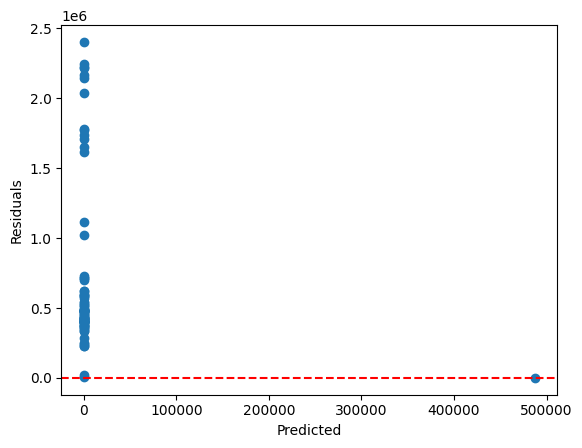

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(result.fittedvalues, result.resid)
ax.axhline(y=0, color='red', linestyle='--')
ax.set_xlabel('Predicted')
ax.set_ylabel('Residuals')
plt.show()